In [1]:
from astropy.table import Table

%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
# better-looking plots
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.figsize'] = (10.0, 8)
plt.rcParams['font.size'] = 18
mpl.ticker.AutoLocator.default_params['nbins'] = 5
mpl.ticker.AutoLocator.default_params['prune'] = 'both'

mpl.rcParams['ps.useafm'] = True
mpl.rcParams['pdf.use14corefonts'] = True
mpl.rcParams['text.usetex'] = True

from astropy.cosmology import FlatLambdaCDM

os.chdir('../../Debiasing/')
from calc_kcor import calc_kcor
import make_dictionaries
os.chdir('../Gas-SF/SF/')
cosmo=FlatLambdaCDM(H0=70,Om0=0.3) # Use standard cosmology model from astropy.

In [3]:
data = Table.read('mass_limited_spirals.fits')

In [7]:
# first assess the number of detections?
data.colnames[-70:]

['PETROMAG_G',
 'PETROMAG_R',
 'PETROMAG_I',
 'PETROMAG_Z',
 'ra_1',
 'dec_1',
 'c15_match',
 'c15_match_flag',
 'baldry_mass_chabrier',
 'chang_mass_chabrier',
 'id',
 'lmass2_5_all',
 'lmass16_all',
 'lmass50_all',
 'lmass84_all',
 'lmass97_5_all',
 'lsfr2_5_all',
 'lsfr16_all',
 'lsfr50_all',
 'lsfr84_all',
 'lsfr97_5_all',
 'lssfr2_5_all',
 'lssfr16_all',
 'lssfr50_all',
 'lssfr84_all',
 'lssfr97_5_all',
 'ldust2_5_all',
 'ldust16_all',
 'ldust50_all',
 'ldust84_all',
 'ldust97_5_all',
 'mu2_5_all',
 'mu16_all',
 'mu50_all',
 'mu84_all',
 'mu97_5_all',
 'tau_v2_5_all',
 'tau_v16_all',
 'tau_v50_all',
 'tau_v84_all',
 'tau_v97_5_all',
 'vmax',
 'lrest_u',
 'lrest_g',
 'lrest_r',
 'lrest_i',
 'lrest_z',
 'lrest_w1',
 'lrest_w2',
 'lrest_w3',
 'lrest_w4',
 'flag_r',
 'flag_w',
 'flag_w1',
 'flag_w2',
 'flag_w3',
 'flag_w4',
 'flag_chi2',
 'flag',
 'OBJECT_TAG',
 'RA',
 'DEC',
 'in_mass_limit',
 'in_spiral',
 'arm_number',
 'petroflux_nsa',
 'petroflux_nsa_ivar',
 'absmag_nsa',
 'absma

In [25]:
for m in range(5):
    
    in_m = data['arm_number'] == m
    data_m = data[in_m]
    print('---m={}--- \n'.format(m+1))
    IR_detected = (data_m['flag_w3'] == 1) | (data_m['flag_w4'] == 1)
    print('FIR detections:{}/{} ({}%)'.format(np.sum(IR_detected),len(IR_detected)
                                              ,np.round(100*np.sum(IR_detected)/len(IR_detected),decimals=1)))
    UV_detected = data_m['nsa_flags'][:,1] == 1
    print('NUV detections: {}/{} ({}%)'.format(np.sum(UV_detected),len(UV_detected)
                                              ,np.round(100*np.sum(UV_detected)/len(UV_detected),decimals=1)))
    print('\n')

---m=1--- 

FIR detections:368/372 (98.9%)
NUV detections: 331/372 (89.0%)


---m=2--- 

FIR detections:3888/3955 (98.3%)
NUV detections: 3413/3955 (86.3%)


---m=3--- 

FIR detections:1037/1045 (99.2%)
NUV detections: 914/1045 (87.5%)


---m=4--- 

FIR detections:381/384 (99.2%)
NUV detections: 332/384 (86.5%)


---m=5--- 

FIR detections:551/555 (99.3%)
NUV detections: 489/555 (88.1%)




/home/ppxrh/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
/home/ppxrh/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


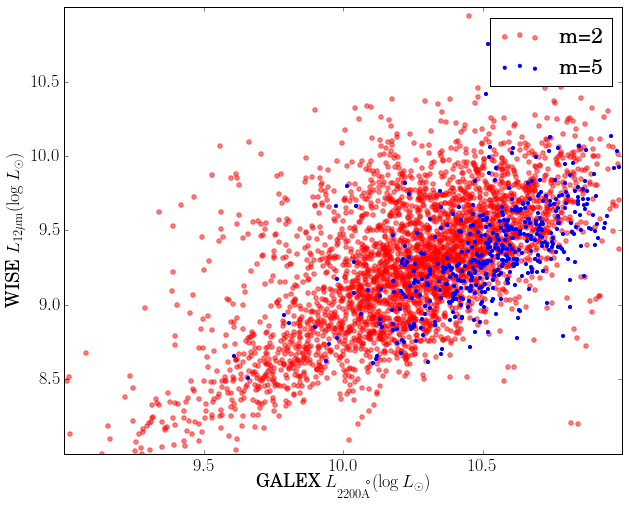

In [81]:
colors_long = ['orange','r','m','g','b','k']

alphas = [0.5,1]
sizes = [20,10]

for i,m in enumerate([1,4]):
    
    data_m = data[data['arm_number'] == m]
    IR_detected = (data_m['flag_w3'] == 1) | (data_m['flag_w4'] == 1)
    UV_detected = data_m['nsa_flags'][:,1] == 1
    ok = (IR_detected) & (UV_detected)
    data_m = data_m[ok]
    
    nuv_lum = np.log10(mag_to_lum(data_m['absmag_nsa'][:,1]))
    x,y = [nuv_lum,data_m['lrest_w3']]
    xy = np.array([x,y]).T
    _ = plt.scatter(x,y,alpha=alphas[i],s=sizes[i],color=colors_long[m],label='m={}'.format(m+1))
    plt.axis((9,11,8,11))
    plt.xlabel('GALEX $L_\mathrm{2200\AA} (\log L_{\odot})$')
    plt.ylabel('WISE $L_\mathrm{12 \mu m} (\log L_{\odot})$')
    plt.legend()
    
plt.savefig('../../../Downloads/L_vs_L.pdf')